In [4]:
fasten_nodes_set = [1428, 1423, 1412, 1391, 1368, 1329, 1289, 1227, 1292, 1331]
stretch_nodes_set = [613, 527, 456, 365, 300, 225, 172, 113, 72, 32]
a = [x - 1 for x in fasten_nodes_set]
a

[1427, 1422, 1411, 1390, 1367, 1328, 1288, 1226, 1291, 1330]

In [31]:
6.98*2

13.96

In [46]:
import random
random_num = int(200 * random.random())
random_num


134

Job-0_forcedata - 弹性刚度: 18.17 N/mm
Job-1_forcedata - 弹性刚度: 62.67 N/mm
Job-2_forcedata - 弹性刚度: 60.07 N/mm
Job-3_forcedata - 弹性刚度: 72.93 N/mm
Job-4_forcedata - 弹性刚度: 18.04 N/mm
Job-5_forcedata - 弹性刚度: 86.56 N/mm
Job-6_forcedata - 弹性刚度: 18.28 N/mm
Job-7_forcedata - 弹性刚度: 17.24 N/mm
Job-8_forcedata - 弹性刚度: 67.90 N/mm
Job-9_forcedata - 弹性刚度: 14.35 N/mm


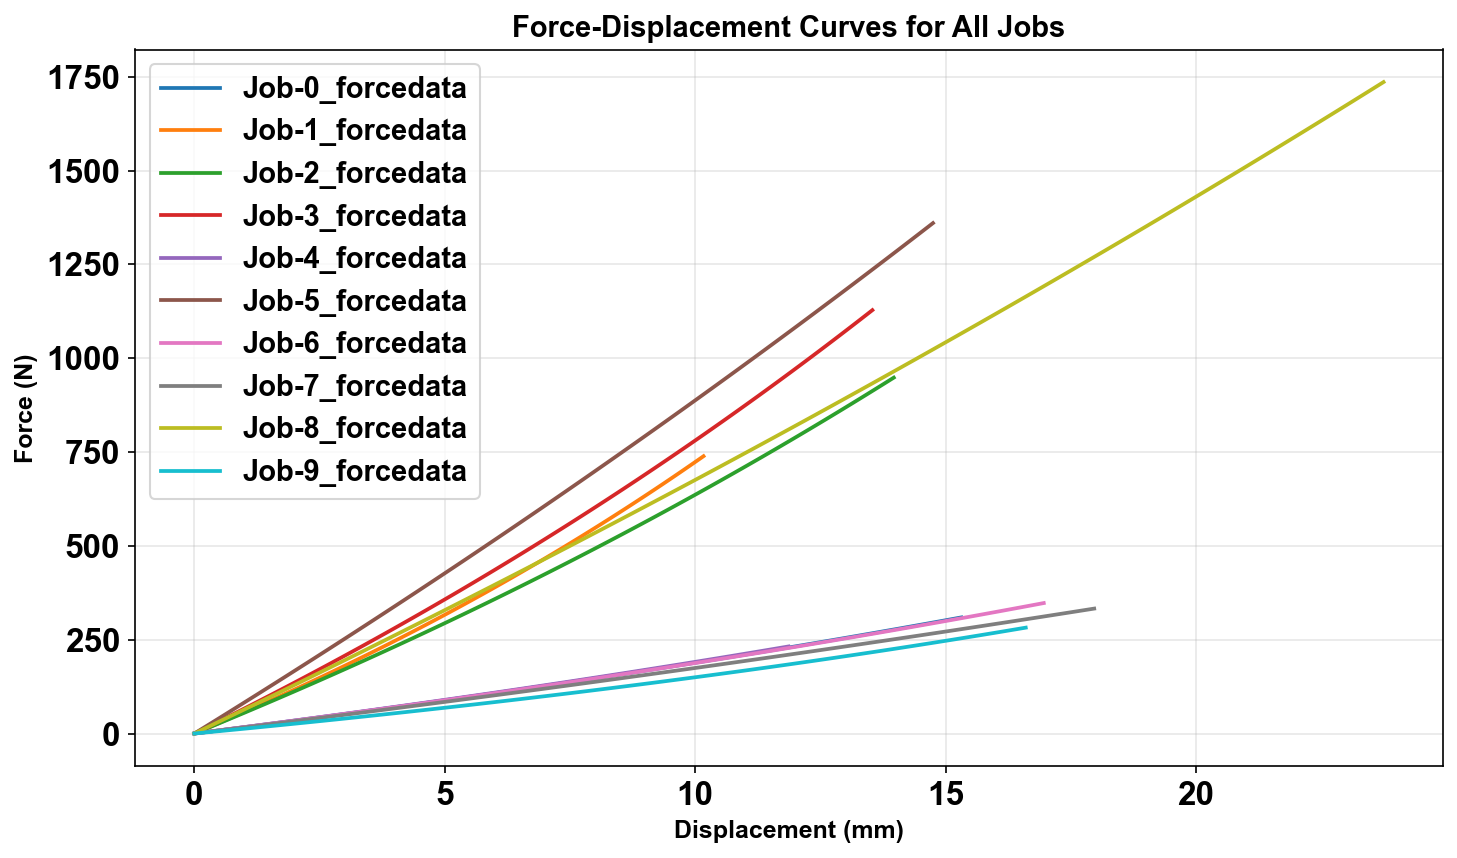

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# 全局字体设置
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 14

def calculate_elastic_slope(displacement, force):
    max_disp = np.max(displacement)
    threshold = 0.5 * max_disp
    mask = displacement <= threshold
    if np.sum(mask) < 2:
        return None, None
    slope, intercept = np.polyfit(displacement[mask], force[mask], 1)
    return slope, intercept

def plot_all_jobs(pattern):
    txt_files = glob.glob(pattern)
    if not txt_files:
        raise FileNotFoundError("未找到匹配的txt文件")
    
    fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(txt_files)))  # 不同颜色映射
    
    for i, file_path in enumerate(txt_files):
        try:
            data = np.genfromtxt(file_path,
                                 skip_header=1,
                                 delimiter=None,
                                 dtype=np.float64,
                                 filling_values=0)
            if data.size == 0:
                continue
            
            force = abs(data[:, 1])
            displacement = data[:, 0]
            slope, _ = calculate_elastic_slope(displacement, force)
            
            job_label = os.path.basename(file_path).replace('.txt', '')
            ax.plot(displacement, force,
                    label=job_label,
                    color=colors[i % len(colors)],
                    linewidth=1.8)
            
            if slope is not None:
                print(f"{job_label} - 弹性刚度: {slope:.2f} N/mm")
            else:
                print(f"{job_label} - 无法计算弹性刚度")
        
        except Exception as e:
            print(f"处理 {file_path} 时发生错误: {str(e)}")
    
    ax.set_xlabel('Displacement (mm)')
    ax.set_ylabel('Force (N)')
    ax.set_title('Force-Displacement Curves for All Jobs')
    ax.legend(loc='best', frameon=True)
    
    plt.tight_layout()
    plt.show()
    plt.close()

# 执行程序
plot_all_jobs("F:/multi_function/mirror_4chiral/temporary_storage/*.txt")
